In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line



<h1> ARIMA </h1>

<h2> Imports </h2>

<h3> Fixing path </h3>

In [2]:
import sys
sys.path.append("..")
%cd ..

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021


In [3]:
import pyforest
import statsmodels.api as sm
from DataPrep.ImportData import importer
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from pmdarima.arima import auto_arima
from sklearn.metrics import r2_score, mean_squared_error

<h2> Preparing Data <h2>

In [4]:
df = importer().Import()

In [5]:
df.index = df["Start Date"]
df = df.drop(columns = ["Start Date"])

In [6]:
df

Label  Charging Time (mins)  Energy (kWh)  Total Duration (mins)  \
Start Date                                                                     
2011-07-29    0.0            114.050000      1.562364             183.533333   
2011-07-30    0.0            426.233333      1.726841             454.433333   
2011-07-31    0.0            647.866667      2.325573             725.983333   
2011-08-01    0.0             95.133333      1.260311             203.566667   
2011-08-02    0.0             72.550000      2.098609              72.716667   
...           ...                   ...           ...                    ...   
2019-12-27    7.0           1056.250000      4.018583            1122.883333   
2019-12-28    7.0            417.533333      4.247111            1550.883333   
2019-12-29    7.0            626.400000      2.646125             669.133333   
2019-12-30    7.0           1305.850000      4.348600            1357.183333   
2019-12-31    7.0           1004.683333      3.383808            1006.866667   

            Port Number   CenterLon  CenterLat  Level 1  Level 2  \
Start Date                                                         
2011-07-29          4.0 -122.160000     37.445        0        2   
2011-07-30         14.0 -122.160000     37.445        0        7   
2011-07-31         16.0 -122.160000     37.445        0        8   
2011-08-01          4.0 -122.160000     37.445        0        2   
2011-08-02          2.0 -122.160000     37.445        0        1   
...                 ...         ...        ...      ...      ...   
2019-12-27         24.0 -122.143998     37.428        0       15   
2019-12-28          9.0 -122.143998     37.429        0        7   
2019-12-29         16.0 -122.143998     37.428        0       11   
2019-12-30         25.0 -122.143998     37.428        0       19   
2019-12-31         26.0 -122.143998     37.428        0       17   

            # Professional & Other Places  ...  Year_Month_5  Year_Month_6  \
Start Date                                 ...                               
2011-07-29                            309  ...             0             0   
2011-07-30                            309  ...             0             0   
2011-07-31                            309  ...             0             0   
2011-08-01                            309  ...             0             0   
2011-08-02                            309  ...             0             0   
...                                   ...  ...           ...           ...   
2019-12-27                            250  ...             0             0   
2019-12-28                            250  ...             0             0   
2019-12-29                            250  ...             0             0   
2019-12-30                            250  ...             0             0   
2019-12-31                            250  ...             0             0   

            Year_Month_7  Year_Month_8  Year_Month_9  Year_Month_10  \
Start Date                                                            
2011-07-29             1             0             0              0   
2011-07-30             1             0             0              0   
2011-07-31             1             0             0              0   
2011-08-01             0             1             0              0   
2011-08-02             0             1             0              0   
...                  ...           ...           ...            ...   
2019-12-27             0             0             0              0   
2019-12-28             0             0             0              0   
2019-12-29             0             0             0              0   
2019-12-30             0             0             0              0   
2019-12-31             0             0             0              0   

            Year_Month_11  Year_Month_12  is_holiday  is_weekend  
Start Date                                                        
2011-07-29   

In [7]:
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)


<IPython.core.display.Javascript object>

In [8]:
df.head()

Label  Charging Time (mins)  Energy (kWh)  Total Duration (mins)  \
2011-07-29    0.0            114.050000      1.562364             183.533333   
2011-07-30    0.0            426.233333      1.726841             454.433333   
2011-07-31    0.0            647.866667      2.325573             725.983333   
2011-08-01    0.0             95.133333      1.260311             203.566667   
2011-08-02    0.0             72.550000      2.098609              72.716667   

            Port Number  CenterLon  CenterLat  Level 1  Level 2  \
2011-07-29          4.0    -122.16     37.445        0        2   
2011-07-30         14.0    -122.16     37.445        0        7   
2011-07-31         16.0    -122.16     37.445        0        8   
2011-08-01          4.0    -122.16     37.445        0        2   
2011-08-02          2.0    -122.16     37.445        0        1   

            # Professional & Other Places  ...  Year_Month_5  Year_Month_6  \
2011-07-29                            309  ...             0             0   
2011-07-30                            309  ...             0             0   
2011-07-31                            309  ...             0             0   
2011-08-01                            309  ...             0             0   
2011-08-02                            309  ...             0             0   

            Year_Month_7  Year_Month_8  Year_Month_9  Year_Month_10  \
2011-07-29             1             0             0              0   
2011-07-30             1             0             0              0   
2011-07-31             1             0             0              0   
2011-08-01             0             1             0              0   
2011-08-02             0             1             0              0   

            Year_Month_11  Year_Month_12  is_holiday  is_weekend  
2011-07-29              0              0           0           0  
2011-07-30              0              0           0           1  
2011-07-31              0              0           0           1  
2011-08-01              0              0           0           0  
2011-08-02              0              0           0           0  

[5 rows x 79 columns]

In [22]:
#df = df.sort_values("Start Date")


In [9]:
labels = df.Label.unique()

In [10]:
labels

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [11]:
y = df["Energy (kWh)"]
X = df.drop(columns = ["Energy (kWh)"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [45]:
y_train.index.max()
y_test.index.max()

Timestamp('2019-12-31 00:00:00')

<h2> Modelling <h2>

<h3> Linear Model using Arima <h3>

<h4> Checking for stationarity </h4>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

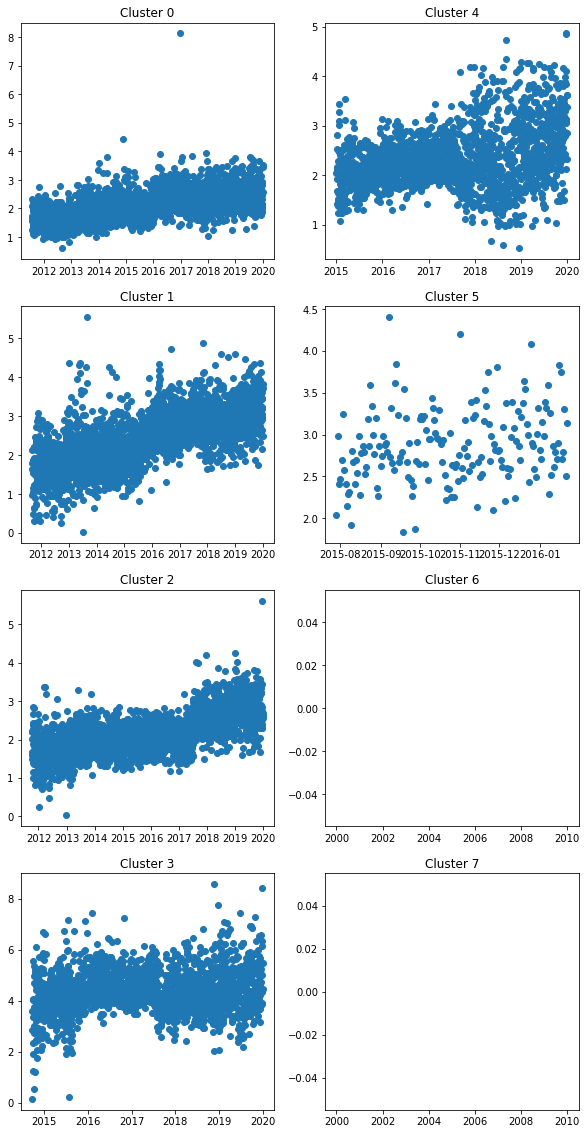

In [172]:
fig, ax = plt.subplots(4,2, figsize=(10,20))


ax[0][0].scatter(y_train[X_train.Label == labels[0]].index,y_train[X_train.Label == labels[0]])
ax[0][0].title.set_text("Cluster 0")

ax[1][0].scatter(y_train[X_train.Label == labels[1]].index,y_train[X_train.Label == labels[1]])
ax[1][0].title.set_text("Cluster 1")

ax[2][0].scatter(y_train[X_train.Label == labels[2]].index,y_train[X_train.Label == labels[2]])
ax[2][0].title.set_text("Cluster 2")

ax[3][0].scatter(y_train[X_train.Label == labels[3]].index,y_train[X_train.Label == labels[3]])
ax[3][0].title.set_text("Cluster 3")

ax[0][1].scatter(y_train[X_train.Label == labels[4]].index,y_train[X_train.Label == labels[4]])
ax[0][1].title.set_text("Cluster 4")

ax[1][1].scatter(y_train[X_train.Label == labels[5]].index,y_train[X_train.Label == labels[5]])
ax[1][1].title.set_text("Cluster 5")

ax[2][1].scatter(y_train[X_train.Label == labels[6]].index,y_train[X_train.Label == labels[6]])
ax[2][1].title.set_text("Cluster 6")

ax[3][1].scatter(y_train[X_train.Label == labels[7]].index,y_train[X_train.Label == labels[7]])
ax[3][1].title.set_text("Cluster 7")

plt.show()

In [12]:
linear_model = ARIMA(y_train, order = (5,0,0), trend='n', enforce_invertibility=False, enforce_stationarity=False)

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecast

In [13]:
model_fit = linear_model.fit(gls=True)

In [14]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Energy (kWh)   No. Observations:                12964
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -10781.759
Date:                Wed, 24 Mar 2021   AIC                          21575.518
Time:                        13:16:14   BIC                          21620.335
Sample:                             0   HQIC                         21590.495
                              - 12964                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2534      0.006     40.846      0.000       0.241       0.266
ar.L2          0.1741      0.006     27.411      0.000       0.162       0.187
ar.L3          0.1976      0.006     31.311      0.0

In [16]:
y_pred = model_fit.forecast(steps=len(y_test))

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


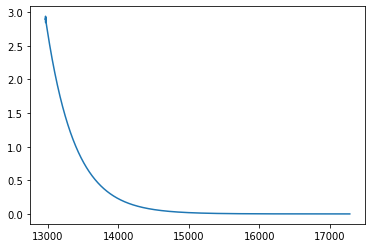

In [17]:
plt.plot(y_pred.index, y_pred.values)
plt.show()

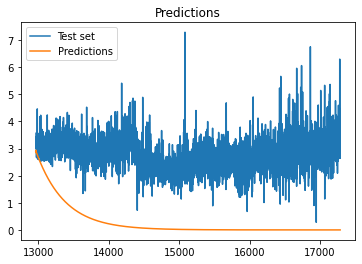

In [18]:
plt.plot(y_pred.index, y_test, label="Test set")
plt.plot(y_pred.index, y_pred.values, label="Predictions")
plt.title("Predictions")
plt.legend()
plt.show()

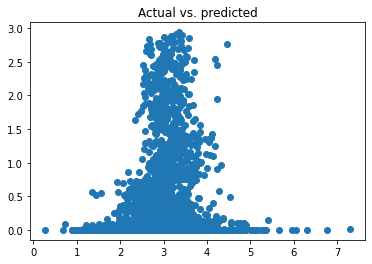

In [19]:
plt.scatter(y_test, y_pred.values)
plt.title("Actual vs. predicted")
plt.show()

In [20]:
r2_score(y_test, y_pred)

-18.479026114116596

In [156]:
model_fit.specification

{'seasonal_periods': 0,
 'measurement_error': False,
 'time_varying_regression': False,
 'simple_differencing': False,
 'enforce_stationarity': False,
 'enforce_invertibility': False,
 'hamilton_representation': False,
 'concentrate_scale': False,
 'trend_offset': 1,
 'order': (5, 0, 0),
 'seasonal_order': (0, 0, 0, 0),
 'k_diff': 0,
 'k_seasonal_diff': 0,
 'k_ar': 5,
 'k_ma': 0,
 'k_seasonal_ar': 0,
 'k_seasonal_ma': 0,
 'k_ar_params': 5,
 'k_ma_params': 0,
 'trend': 'n',
 'k_trend': 0,
 'k_exog': 0,
 'mle_regression': False,
 'state_regression': False}

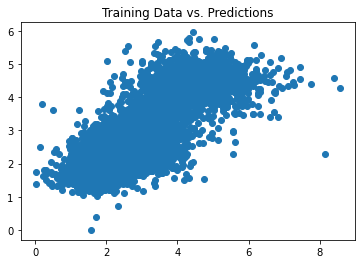

In [21]:
plt.scatter(y_train,model_fit.predict())
plt.title("Training Data vs. Predictions")
plt.show()

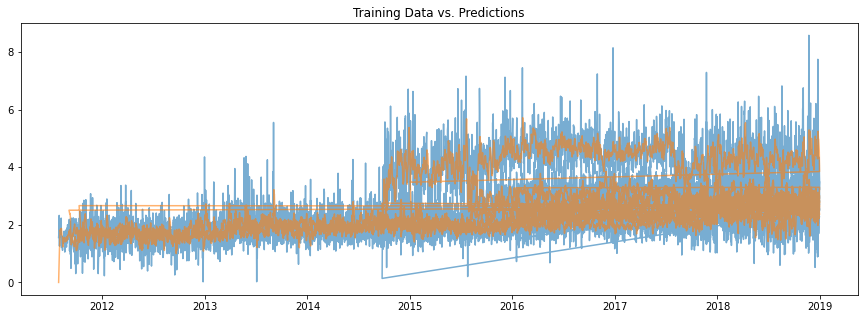

In [41]:
plt.rcParams["figure.figsize"] = (15,5)

plt.plot(y_train, alpha=0.6)
plt.plot(model_fit.predict(), alpha = 0.6)
plt.title("Training Data vs. Predictions")
plt.show()

In [38]:
y_train

2011-07-29    1.562364
2011-07-30    1.726841
2011-07-31    2.325573
2011-08-01    1.260311
2011-08-02    2.098609
                ...   
2018-12-27    3.282766
2018-12-28    2.129533
2018-12-29    3.679115
2018-12-30    2.618333
2018-12-31    2.496217
Name: Energy (kWh), Length: 14371, dtype: float64

In [23]:
r2_score(y_train, model_fit.predict())

0.6865511028994531

In [24]:
mean_squared_error(y_train, model_fit.predict())

0.3096135947356885

<h3> Rolling Modelling </h3>

In [25]:
years = df.index.year.unique()
df["Energy (kWh)"]

2011-07-29    1.562364
2011-07-30    1.726841
2011-07-31    2.325573
2011-08-01    1.260311
2011-08-02    2.098609
                ...   
2019-12-27    4.018583
2019-12-28    4.247111
2019-12-29    2.646125
2019-12-30    4.348600
2019-12-31    3.383808
Name: Energy (kWh), Length: 17286, dtype: float64

[array([ True,  True,  True, ..., False, False, False])]

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:

for year in years:
    if year < 2019:
        y_train = df["Energy (kWh)"][df.index.year <= year]
        linear_model = ARIMA(y_train, order = (5,0,0), trend='n', enforce_invertibility=False, enforce_stationarity=False)
        model_fit = linear_model.fit(gls=True)
        y_test = df["Energy (kWh)"][df.index.year == year + 1]
        y_pred = model_fit.forecast(steps=len(y_test))
        y_pred_in = model_fit.predict()
        print(40*"-")
        print(f"For training up until year: {year} \nOut-sample \nMSE = {mean_squared_error(y_test, y_pred)}\nr^2 = {r2_score(y_test, y_pred)} \n")
        print(f"in-sample \nMSE = {mean_squared_error(y_train, y_pred_in)}\nr^2 = {r2_score(y_train, y_pred_in)}")
        print(40*"-")

----------------------------------------
For training up until year: 2011 
Out-sample 
MSE = 2.109070494931225
r^2 = -11.499993183044303 

in-sample 
MSE = 0.2403583344345927
r^2 = -0.21922690868550743
----------------------------------------
----------------------------------------
For training up until year: 2012 
Out-sample 
MSE = 2.8422803510469503
r^2 = -12.389908507346522 

in-sample 
MSE = 0.2033444948950127
r^2 = -0.16009406939076576
----------------------------------------
----------------------------------------
For training up until year: 2013 
Out-sample 
MSE = 3.8314443607350483
r^2 = -6.306294196028103 

in-sample 
MSE = 0.21863614056570005
r^2 = -0.07754293617424568
----------------------------------------
----------------------------------------
For training up until year: 2014 
Out-sample 
MSE = 5.821495783052205
r^2 = -5.363384623985808 

in-sample 
MSE = 0.2508975676482855
r^2 = 0.25341065122210227
----------------------------------------
----------------------------

In [69]:
stepwise_model = auto_arima(y_train[X_train.Label == labels[0]], 
                            start_p=5, 
                            start_q=2,
                            max_p=10, 
                            max_q=10, 
                            m=12,
                            start_P=0, 
                            seasonal=True,
                            d=1, 
                            D=1, 
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True
                           )

Performing stepwise search to minimize aic
 ARIMA(5,1,2)(0,1,1)[12]             : AIC=inf, Time=6.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6686.729, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5388.463, Time=0.50 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6018.413, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5134.729, Time=1.52 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.23 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5801.788, Time=1.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4845.252, Time=2.54 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5114.406, Time=1.19 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=12.60 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.98 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=4708.372, Time=2.43 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=4965.

In [70]:
stepwise_model.fit(y_train[X_train.Label == labels[0]])

ARIMA(order=(10, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
print(f'AR-params:\n{stepwise_model.arparams()} \n\nMA-params:\n{stepwise_model.maparams()}')

In [71]:
y_pred = stepwise_model.predict(n_periods=len(y_test[X_test.Label == labels[0]]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

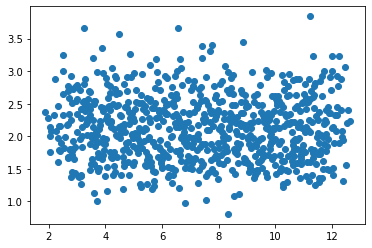

In [72]:
plt.scatter(y_pred, y_test[X_test.Label == labels[0]])
plt.show()

In [73]:
r2_score(y_test[X_test.Label == labels[0]],y_pred)

-145.12547552972538